In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt

In [2]:
#load data
(xtrain, ytrain), (xtest,ytest)=mnist.load_data()
mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [3]:
#Normalize the data..Rescales pixel values to a range between 0 and 1 for easier training.
xtrain= normalize(xtrain, axis=1)
xtest= normalize(xtest, axis=1)

In [4]:
model=Sequential()
model.add(Flatten(input_shape=(28,28))) #Flattening transforms the 2D feature maps into a 1D vector to input into the dense layers.
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# train the model
model.fit(xtrain,ytrain, epochs=3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8652 - loss: 0.4721
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1182
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0739


In [5]:
#evaluate the model
loss, accuracy=model.evaluate(xtest, ytest)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9614 - loss: 0.1186
Loss: 0.10561671108007431
Accuracy: 0.9664000272750854


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
This digit is probably [7]


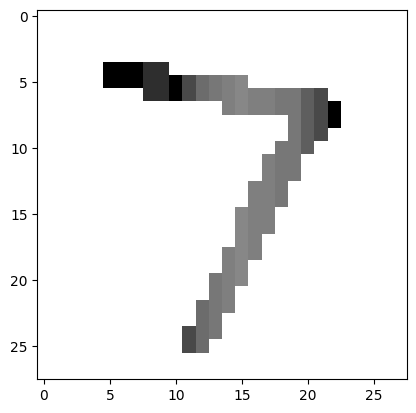

In [6]:
# Make predictions on digit files

 #Load the image in grayscale mode and resize if necessary so it has only one channel insted of 3
img=cv2.imread(r"/content/image3.png", cv2.IMREAD_GRAYSCALE)

# Resizing to 28x28 if needed
img = cv2.resize(img, (28, 28))

# Invert colors, expand dimensions, and normalize
img=np.invert(img)           # turning dark pixels into light pixels and vice versa.
img = img.reshape(1, 28, 28)  # Add batch dimension
img = normalize(img,axis=1)  # Normalize to match model's expected input range

#predict
prediction=model.predict(img)
print(f"This digit is probably {np.argmax(prediction,axis=1)}")

#Display the image
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()
